## Import requirements

In [8]:
# requirements:

import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

## The required class

1. BanditMachine: A class that represents the bandit machine.
2. EpsilonGreedy: A class that represents the epsilon greedy algorithm. 
3. UCB: A class that represents the upper confidence bound algorithm.


In [9]:
# class BanditMachine:

class BanditMachine:
    def __init__(self, n_arms):
        self.n_arms = n_arms  # number of arms
        
        self.sigma = 1  # reward distribution's standard deviation
        self.miu_list = np.random.normal(0, self.sigma, n_arms)  # initialize the mean of each arm's reward
        self.counts = np.zeros(n_arms, dtype=int)  # record the number of each arm being pulled
        self.values = np.zeros(n_arms)  # record the estimated value of each arm
        
    def update(self, arm, reward):
        """
        update the arm's information
        :param arm: int, index of the arm
        :param reward: float, reward
        """
        self.counts[arm] += 1
        n = self.counts[arm]
        value = self.values[arm]
        self.values[arm] = ((n - 1) / n) * value + (1 / n) * reward # incremental update of the estimated value

    def play(self, arm):
        """
        play the arm and get the reward
        :param arm: int, index of the arm
        :return: float, reward
        """
        if arm < 0 or arm >= self.n_arms:
            raise ValueError("Arm index is out of range.")
        
        # generate the reward
        reward = np.random.normal(self.miu_list[arm], self.sigma)
        # update the arm's information
        self.update(arm, reward)
        return reward


In [10]:
# class EpsilonGreedy:

class EpsilonGreedy:
    def __init__(self, machines, epsilon):
        """
        :param machines: BanditMachine, multi-armed bandit machine object
        :param epsilon: float, probability of randomly selecting an arm
        """
        self.machines = machines
        self.epsilon = epsilon
        self.arms = machines.miu_list
        self.n_arms = len(self.arms)
        self.counts = np.zeros(self.n_arms, dtype=int)  # record the number of each arm being pulled
        self.values = np.zeros(self.n_arms, dtype=float)  # record the estimated value of each arm
        self.total_counts = 0  # record the total number of arms being pulled

    def select_arm(self):
        # if there are arms that have never been pulled, then pull them
        for arm in range(self.n_arms):
            if self.counts[arm] == 0:
                return arm
        
        # with probability epsilon, randomly select an arm, otherwise select the arm with the highest estimated value
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        else:
            return np.argmax(self.values)

    def update(self, chosen_arm, reward):
        # update the estimated value of the chosen arm
        self.total_counts += 1
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

    def play(self):
        # choose an arm and pull it
        chosen_arm = self.select_arm()
        reward = self.machines.play(chosen_arm)
        self.update(chosen_arm, reward)
        return chosen_arm, reward


In [11]:
class UCB:
    def __init__(self, machines, c):
        """
        :param arms: list, each element is the mean of the reward distribution of an arm
        :param c: float, a constant that controls the degree of exploration
        """
        self.machines = machines
        self.c = c 
        self.arms = machines.miu_list # the list of arms
        self.n_arms = len(self.arms) # number of arms
        self.counts = np.zeros(self.n_arms, dtype=int)  # record the number of each arm being pulled
        self.values = np.zeros(self.n_arms, dtype=float)  # record the estimated value of each arm
        self.total_counts = 0 # record the total number of arms being pulled

    def select_arm(self):
        # if there are arms that have never been pulled, then pull them
        for i in range(self.n_arms):
            if self.counts[i] == 0:
                return i
        
        
        # return the arm with the highest UCB value
        ucb_values = self.values + self.c * np.sqrt(np.log(self.total_counts) / (self.counts + 1))
        return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):
        # update the estimated value of the chosen arm
        self.total_counts += 1
        self.counts[chosen_arm] += 1
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        self.values[chosen_arm] = ((n - 1) / n) * value + (1 / n) * reward

    def play(self):
        # choose an arm and pull it
        chosen_arm = self.select_arm()
        reward = self.machines.play(chosen_arm)
        self.update(chosen_arm, reward)
        return chosen_arm, reward


## Visualization

In [12]:
# initialize BanditMachine with 10 arms
# bandit = BanditMachine(10)
# optimal = np.argmax(bandit.miu_list)

# eps_01 = EpsilonGreedy(bandit,0.1)
# eps_00 = EpsilonGreedy(bandit,0)
# eps_001 = EpsilonGreedy(bandit,0.01)
# ucb_2 = UCB(bandit,2)
# ucb_1 = UCB(bandit,1)
# ucb_05 = UCB(bandit,0.5)



# define the function to test the algorithm

# def test_algo(algo, runs, step):    
#     Q_runs_lst = [[] for m in range(runs)]
#     Q_runs_lst_average = [0 for n in range(step)]
#     action_runs_lst = [[] for k in range(runs)]
#     action_runs_lst_average = [0 for j in range(step)]

#     for run_times in range(runs):
#         algo.counts = np.zeros(algo.n_arms, dtype=int)
#         algo.values = np.zeros(algo.n_arms, dtype=float)
#         algo.total_counts = 0
#         for k in range(step):
#             action, reward = algo.play()
#             Q_runs_lst[run_times].append(reward)
#             if k >= 10:  # Start calculating optimal actions after the first 10 steps
#                 sum_best_action = 1 if action == optimal else 0
#                 action_runs_lst[run_times].append(sum_best_action)
#             else:
#                 action_runs_lst[run_times].append(0)  # Do not count the first 10 steps as optimal/non-optimal
                
#     for i in range(step):
#         for j in range(runs):
#             if i >= 10:  # Consider rewards from the 11th step onwards for averaging
#                 Q_runs_lst_average[i] += Q_runs_lst[j][i]
#                 action_runs_lst_average[i] += action_runs_lst[j][i]
#         if i >= 10:  # Update average calculations to only consider steps after the first 10
#             Q_runs_lst_average[i] /= runs
#             action_runs_lst_average[i] /= runs
#         else:
#             Q_runs_lst_average[i] = 0  # Set average rewards to 0 for the first 10 steps
            
#     return Q_runs_lst_average, action_runs_lst_average




# def test_algo(algo, runs, step):
#     Q_runs_lst = [[] for _ in range(runs)]
#     Q_runs_lst_average = [0 for _ in range(step)]
#     action_runs_lst = [[] for _ in range(runs)]
#     action_runs_lst_average = [0 for _ in range(step)]

#     for run_times in range(runs):
#         algo.counts = np.zeros(algo.n_arms, dtype=int)
#         algo.values = np.zeros(algo.n_arms, dtype=float)
#         for k in range(step):
#             action, reward = algo.play()
#             Q_runs_lst[run_times].append(reward)
#             action_runs_lst[run_times].append(1 if action == optimal else 0)

#     for i in range(step):
#         for j in range(runs):
#             Q_runs_lst_average[i] += Q_runs_lst[j][i]
#             action_runs_lst_average[i] += action_runs_lst[j][i]
#         Q_runs_lst_average[i] /= runs
#         action_runs_lst_average[i] /= runs

#     return Q_runs_lst_average, action_runs_lst_average

def test_algo(algo_type, epsilon, c, n_arms, runs, step):
    # 初始化保存奖励和最优动作选择的列表
    Q_runs_lst_average = [0 for _ in range(step)]
    action_runs_lst_average = [0 for _ in range(step)]

    for run_times in range(runs):
        # 每次运行都重新初始化BanditMachine和策略
        bandit = BanditMachine(n_arms)
        optimal = np.argmax(bandit.miu_list)
        
        if algo_type == 'EpsilonGreedy':
            algo = EpsilonGreedy(bandit, epsilon)
        elif algo_type == 'UCB':
            algo = UCB(bandit, c)
        else:
            raise ValueError("Unsupported algorithm type")

        for k in range(step):
            action, reward = algo.play()
            Q_runs_lst_average[k] += reward
            if action == optimal:
                action_runs_lst_average[k] += 1

    # 计算平均奖励和最优动作选择率
    Q_runs_lst_average = [x / runs for x in Q_runs_lst_average]
    action_runs_lst_average = [x / runs for x in action_runs_lst_average]

    return Q_runs_lst_average, action_runs_lst_average


In [13]:
# run the algorithm and get the average reward and best action rate of each step
# eps_01_reward,eps_01_rate = test_algo(eps_01,runs,step)
# eps_00_reward,eps_00_rate = test_algo(eps_00,runs,step)
# eps_001_reward,eps_001_rate = test_algo(eps_001,runs,step)
# ucb_1_reward,ucb_1_rate = test_algo(ucb_1,runs,step)
# ucb_05_reward,ucb_05_rate = test_algo(ucb_05,runs,step)
# ucb_2_reward,ucb_2_rate = test_algo(ucb_2,runs,step)

step = 2000
runs = 1000

eps_01_reward,eps_01_rate = test_algo('EpsilonGreedy', 0.1, 0, 10, runs, step)
eps_00_reward,eps_00_rate = test_algo('EpsilonGreedy', 0, 0, 10, runs, step)
eps_001_reward,eps_001_rate = test_algo('EpsilonGreedy', 0.01, 0, 10, runs, step)
ucb_1_reward,ucb_1_rate = test_algo('UCB', 0, 1, 10, runs, step)
ucb_05_reward,ucb_05_rate = test_algo('UCB', 0, 0.5, 10, runs, step)
ucb_2_reward,ucb_2_rate = test_algo('UCB', 0, 2, 10, runs, step)


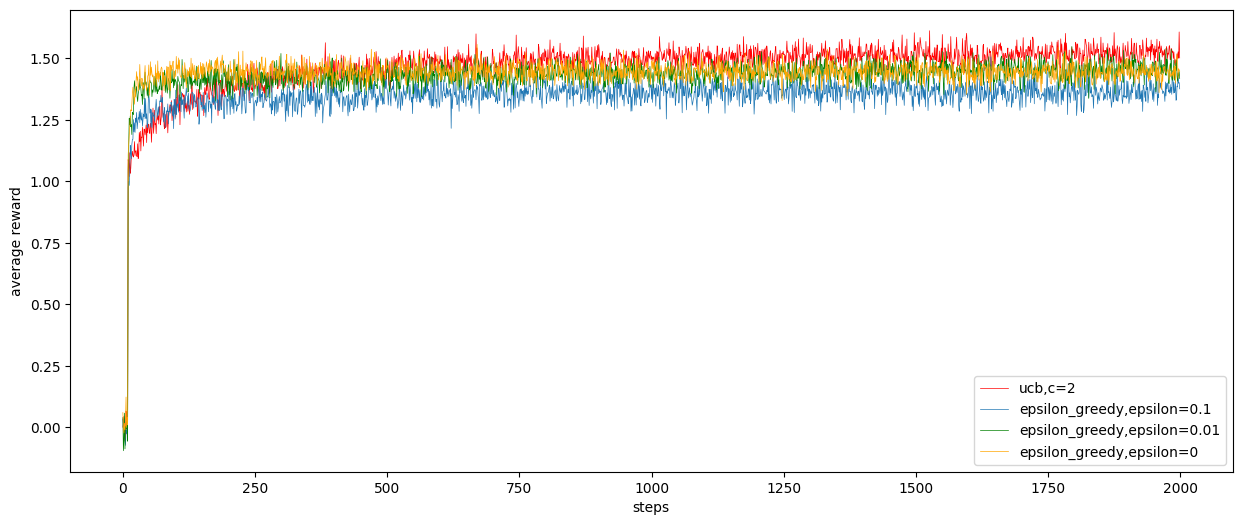

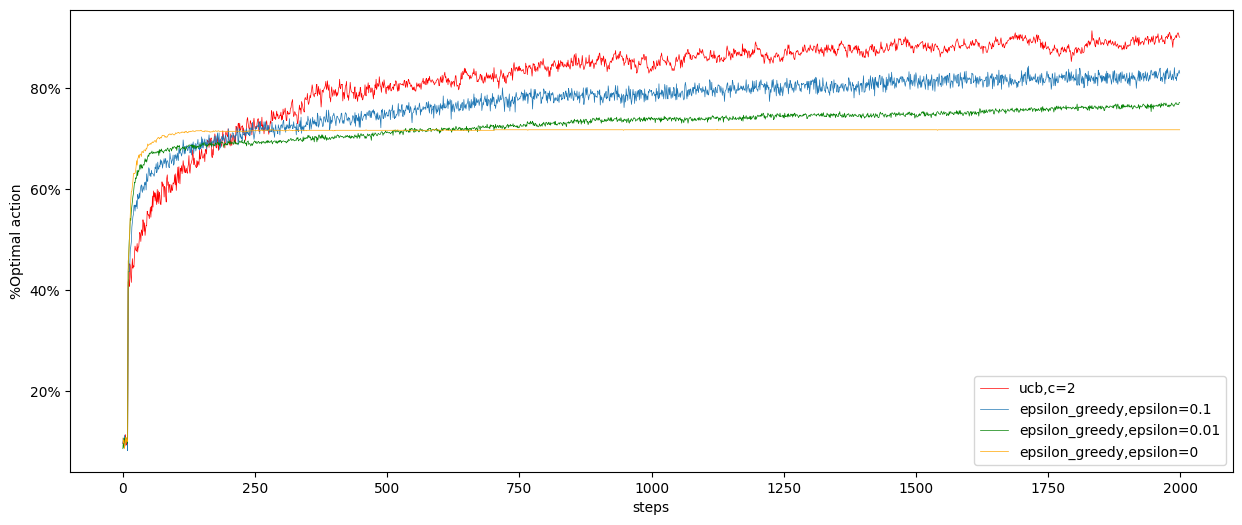

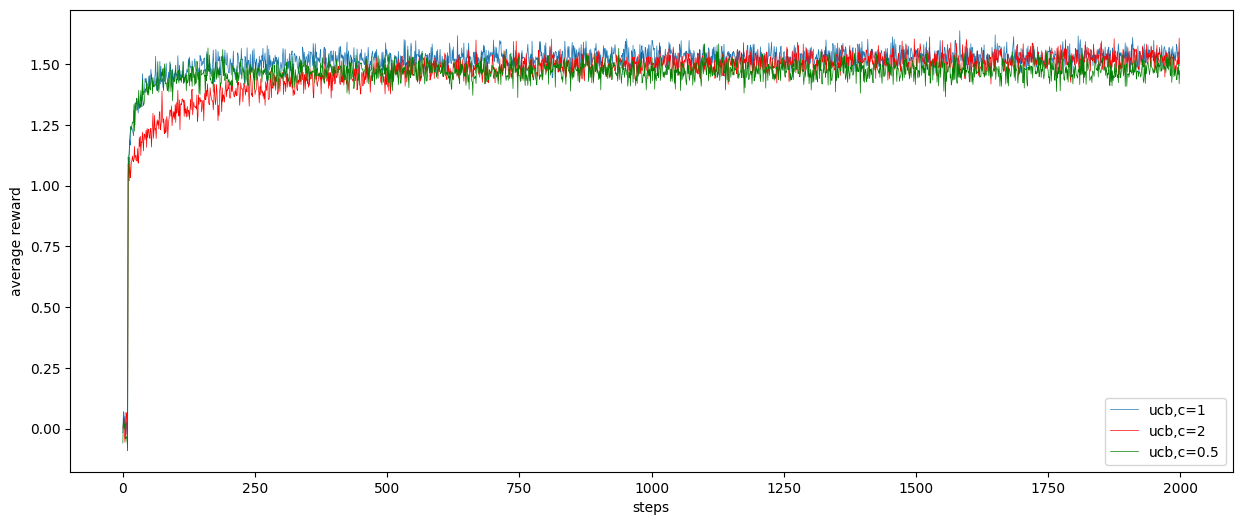

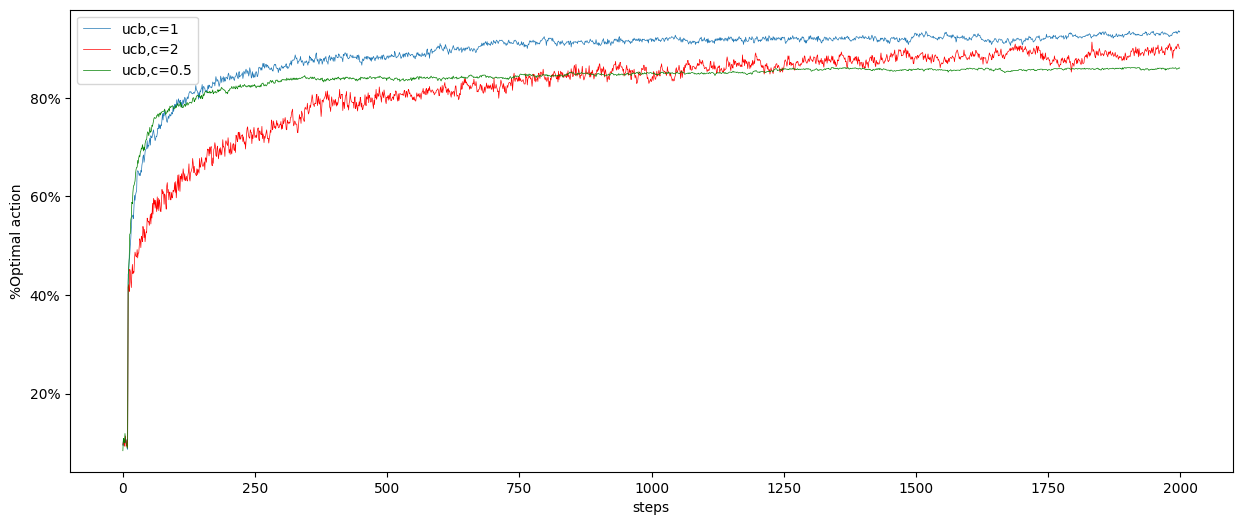

In [14]:
# plot the average reward and best action rate of each step
plt.figure(1,figsize=(15,6))

# set the format of the y-axis as a percentage
def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'

x = range(step)
plt.plot(x,ucb_2_reward,linewidth=0.5,color='r',label="ucb,c=2")
plt.plot(x,eps_01_reward,linewidth=0.5,label="epsilon_greedy,epsilon=0.1")
plt.plot(x,eps_001_reward,linewidth=0.5,color='g',label="epsilon_greedy,epsilon=0.01")
plt.plot(x,eps_00_reward,linewidth=0.5,color='orange',label="epsilon_greedy,epsilon=0")
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend(loc="best")
plt.figure(2,figsize=(15,6))
plt.plot(x,ucb_2_rate,linewidth=0.5,color='r',label="ucb,c=2")
plt.plot(x,eps_01_rate,linewidth=0.5,label="epsilon_greedy,epsilon=0.1")
plt.plot(x,eps_001_rate,linewidth=0.5,color='g',label="epsilon_greedy,epsilon=0.01")
plt.plot(x,eps_00_rate,linewidth=0.5,color='orange',label="epsilon_greedy,epsilon=0")
plt.xlabel('steps')
plt.ylabel('%Optimal action')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.legend(loc="best")
plt.figure(3,figsize=(15,6))
plt.plot(x,ucb_1_reward,linewidth=0.5,label="ucb,c=1")
plt.plot(x,ucb_2_reward,linewidth=0.5,color='r',label="ucb,c=2")
plt.plot(x,ucb_05_reward,linewidth=0.5,color='g',label="ucb,c=0.5")
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend(loc="best")
plt.figure(4,figsize=(15,6))
plt.plot(x,ucb_1_rate,linewidth=0.5,label="ucb,c=1")
plt.plot(x,ucb_2_rate,linewidth=0.5,color='r',label="ucb,c=2")
plt.plot(x,ucb_05_rate,linewidth=0.5,color='g',label="ucb,c=0.5")
plt.xlabel('steps')
plt.ylabel('%Optimal action')
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.legend(loc="best")
plt.show()